# Modelos Matemáticos nas Partilhas

## Sistemas de Distribuição de Lugares

### Método de Hondt

O método de Hondt é um sistema de representação proporcional usado para atribuir lugares em assembleias legislativas.

**Exemplo**

## Princípios de Partilha Justa

A partilha justa é um conceito fundamental em muitas situações da vida real, desde a divisão de recursos até a alocação de tarefas. Vamos explorar alguns princípios básicos.

```python
def verificar_proporcionalidade(recursos, alocacao, populacao):
    total_recursos = sum(recursos.values())
    total_populacao = sum(populacao.values())
    
    for entidade in recursos.keys():
        proporcao_ideal = populacao[entidade] / total_populacao
        proporcao_real = recursos[entidade] / total_recursos
        
        print(f"{entidade}:")
        print(f"  Proporção ideal: {proporcao_ideal:.2%}")
        print(f"  Proporção real: {proporcao_real:.2%}")
        print(f"  Diferença: {abs(proporcao_ideal - proporcao_real):.2%}")
        print()

# Exemplo
recursos = {'A': 100, 'B': 150, 'C': 50}
populacao = {'A': 1000, 'B': 1500, 'C': 500}

print("Análise de proporcionalidade na alocação de recursos:")
verificar_proporcionalidade(recursos, recursos, populacao)
```

## Métodos de Partilha

### Método da Divisão Proporcional

```python
def divisao_proporcional(total, proporcoes):
    fator = total / sum(proporcoes.values())
    return {k: v * fator for k, v in proporcoes.items()}

# Exemplo
orcamento_total = 1000000
populacao = {'Cidade A': 50000, 'Cidade B': 30000, 'Cidade C': 20000}

alocacao = divisao_proporcional(orcamento_total, populacao)

print("Alocação de orçamento por divisão proporcional:")
for cidade, valor in alocacao.items():
    print(f"{cidade}: {valor:.2f}")
```

### Método da Eliminação do Candidato Mais Fraco

Este método é usado em situações onde é necessário eliminar opções gradualmente.

```python
def eliminacao_mais_fraco(votos):
    while len(votos) > 1:
        contagem = {candidato: sum(pref[0] == candidato for pref in votos.values()) for candidato in set(pref[0] for pref in votos.values())}
        eliminado = min(contagem, key=contagem.get)
        votos = {eleitor: [c for c in pref if c != eliminado] for eleitor, pref in votos.items()}
        print(f"Candidato eliminado: {eliminado}")
    return votos[next(iter(votos))][0]

# Exemplo
votos = {
    'Eleitor 1': ['A', 'B', 'C', 'D'],
    'Eleitor 2': ['B', 'A', 'D', 'C'],
    'Eleitor 3': ['C', 'B', 'A', 'D'],
    'Eleitor 4': ['B', 'C', 'D', 'A'],
    'Eleitor 5': ['D', 'C', 'A', 'B']
}

vencedor = eliminacao_mais_fraco(votos)
print(f"Vencedor final: {vencedor}")
```

### Método da Distribuição dos Restos

Este método é frequentemente usado em sistemas eleitorais proporcionais.

```python
def distribuicao_restos(votos, assentos):
    total_votos = sum(votos.values())
    quociente = total_votos / assentos
    alocacao_inicial = {partido: int(votos[partido] / quociente) for partido in votos}
    restos = {partido: votos[partido] % quociente for partido in votos}
    
    assentos_restantes = assentos - sum(alocacao_inicial.values())
    for _ in range(assentos_restantes):
        partido_max_resto = max(restos, key=restos.get)
        alocacao_inicial[partido_max_resto] += 1
        restos[partido_max_resto] = 0
    
    return alocacao_inicial

# Exemplo
votos_partidos = {'A': 100000, 'B': 80000, 'C': 30000, 'D': 20000}
num_assentos = 10

resultado = distribuicao_restos(votos_partidos, num_assentos)
print("Distribuição de assentos pelo método dos restos:")
for partido, assentos in resultado.items():
    print(f"{partido}: {assentos} assentos")
```

## Aplicações Práticas de Partilhas

### Distribuição de Recursos em Organizações

```python
def distribuir_recursos(orcamento_total, departamentos, criterios):
    pontuacao_total = sum(sum(criterio[dept] for criterio in criterios.values()) for dept in departamentos)
    alocacao = {dept: 0 for dept in departamentos}
    
    for dept in departamentos:
        pontos_dept = sum(criterio[dept] for criterio in criterios.values())
        alocacao[dept] = (pontos_dept / pontuacao_total) * orcamento_total
    
    return alocacao

# Exemplo
orcamento = 1000000
departamentos = ['RH', 'TI', 'Marketing', 'Vendas']
criterios = {
    'tamanho': {'RH': 20, 'TI': 30, 'Marketing': 15, 'Vendas': 35},
    'impacto': {'RH': 25, 'TI': 35, 'Marketing': 20, 'Vendas': 20},
    'urgencia': {'RH': 15, 'TI': 25, 'Marketing': 30, 'Vendas': 30}
}

alocacao = distribuir_recursos(orcamento, departamentos, criterios)

print("Alocação de recursos por departamento:")
for dept, valor in alocacao.items():
    print(f"{dept}: {valor:.2f}")
```

### Divisão de Heranças

```python
def dividir_heranca(valor_total, herdeiros, pesos):
    total_pesos = sum(pesos.values())
    divisao = {herdeiro: (peso / total_pesos) * valor_total for herdeiro, peso in pesos.items()}
    return divisao

# Exemplo
valor_heranca = 1000000
herdeiros = ['Alice', 'Bob', 'Charlie']
pesos = {'Alice': 2, 'Bob': 1, 'Charlie': 1}  # Alice recebe o dobro dos outros

divisao = dividir_heranca(valor_heranca, herdeiros, pesos)

print("Divisão da herança:")
for herdeiro, valor in divisao.items():
    print(f"{herdeiro}: {valor:.2f}")
```

## Fairness e Equidade em Partilhas

```python
def avaliar_equidade(alocacao, necessidades):
    satisfacao = {entidade: alocacao[entidade] / necessidades[entidade] for entidade in alocacao}
    
    print("Avaliação de equidade:")
    for entidade, nivel in satisfacao.items():
        print(f"{entidade}: {nivel:.2%} das necessidades atendidas")
    
    desigualdade = max(satisfacao.values()) - min(satisfacao.values())
    print(f"\nÍndice de desigualdade: {desigualdade:.2f}")
    
    return desigualdade

# Exemplo
alocacao_recursos = {'Dept A': 100000, 'Dept B': 150000, 'Dept C': 50000}
necessidades = {'Dept A': 120000, 'Dept B': 180000, 'Dept C': 70000}

avaliar_equidade(alocacao_recursos, necessidades)
```

In [49]:
def metodo_hondt(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
lugares = 10
resultado = metodo_hondt(votos, lugares)
print("Distribuição de lugares pelo método de Hondt:")
for partido, num_lugares in resultado.items():
    print(f"{partido}: {num_lugares} lugares")

Distribuição de lugares pelo método de Hondt:
Partido A: 5 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 0 lugares


### Método de Sainte-Laguë

O método de Sainte-Laguë é outra forma de distribuição proporcional de assentos, que tende a favorecer partidos menores em comparação com o método de Hondt.

**Exemplo**

In [53]:
def metodo_sainte_lague(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (2 * distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

# Exemplo

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
lugares = 10
resultado = metodo_sainte_lague(votos, lugares)
print("\nDistribuição de lugares pelo método de Sainte-Laguë:")
for partido, num_lugares in resultado.items():
    print(f"{partido}: {num_lugares} lugares")


Distribuição de lugares pelo método de Sainte-Laguë:
Partido A: 4 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 1 lugares


### Visualização da comparação entre os dois métodos

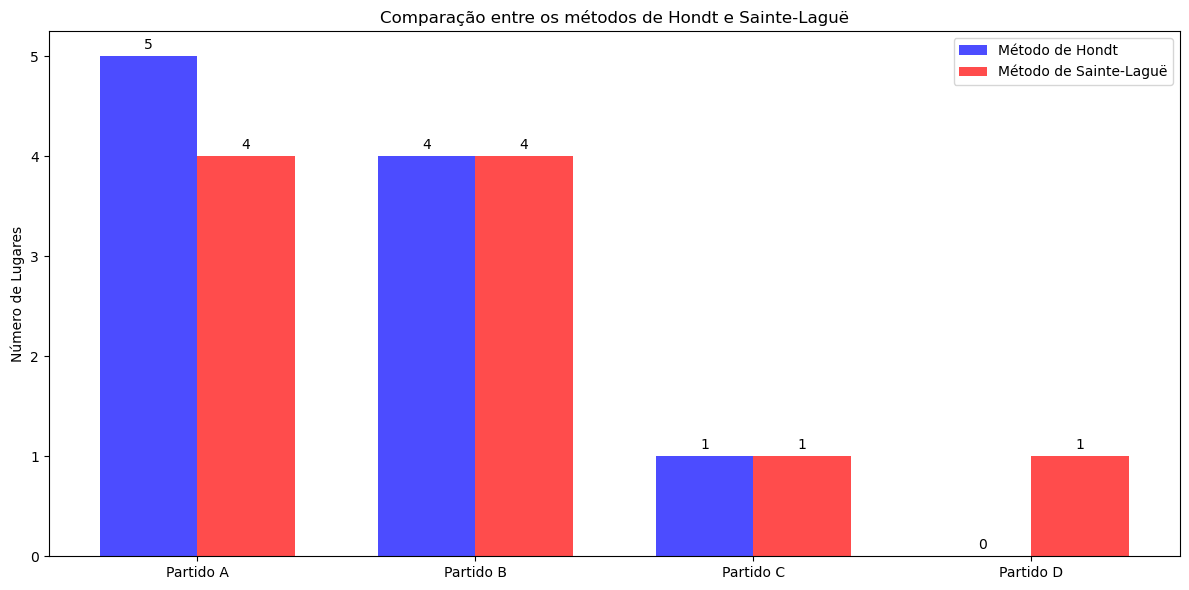

Distribuição de lugares pelo método de Hondt:
Partido A: 5 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 0 lugares

Distribuição de lugares pelo método de Sainte-Laguë:
Partido A: 4 lugares
Partido B: 4 lugares
Partido C: 1 lugares
Partido D: 1 lugares


In [56]:
import matplotlib.pyplot as plt

def metodo_hondt(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

def metodo_sainte_lague(votos, lugares):
    partidos = list(votos.keys())
    distribuicao = {partido: 0 for partido in partidos}
    
    for _ in range(lugares):
        quocientes = {partido: votos[partido] / (2 * distribuicao[partido] + 1) for partido in partidos}
        vencedor = max(quocientes, key=quocientes.get)
        distribuicao[vencedor] += 1
    
    return distribuicao

def comparar_metodos(votos, lugares):
    resultado_hondt = metodo_hondt(votos, lugares)
    resultado_sainte_lague = metodo_sainte_lague(votos, lugares)

    partidos = list(votos.keys())
    lugares_hondt = [resultado_hondt[partido] for partido in partidos]
    lugares_sainte_lague = [resultado_sainte_lague[partido] for partido in partidos]

    x = range(len(partidos))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar([i - width/2 for i in x], lugares_hondt, width, label='Método de Hondt', color='blue', alpha=0.7)
    rects2 = ax.bar([i + width/2 for i in x], lugares_sainte_lague, width, label='Método de Sainte-Laguë', color='red', alpha=0.7)

    ax.set_ylabel('Número de Lugares')
    ax.set_title('Comparação entre os métodos de Hondt e Sainte-Laguë')
    ax.set_xticks(x)
    ax.set_xticklabels(partidos)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

    print("Distribuição de lugares pelo método de Hondt:")
    for partido, num_lugares in resultado_hondt.items():
        print(f"{partido}: {num_lugares} lugares")

    print("\nDistribuição de lugares pelo método de Sainte-Laguë:")
    for partido, num_lugares in resultado_sainte_lague.items():
        print(f"{partido}: {num_lugares} lugares")

# Exemplo de uso

votos = {'Partido A': 100000, 'Partido B': 80000, 'Partido C': 30000, 'Partido D': 20000}
lugares = 10
comparar_metodos(votos, lugares)

## Análise e Comparação de Sistemas Eleitorais

Nesta seção, vamos analisar e comparar diferentes sistemas eleitorais, destacando suas vantagens e desvantagens.

Após executar o código, poderá observar:

- Um resumo textual dos resultados para cada sistema eleitoral.
- Dois gráficos de barras comparando os sistemas: (Frequência do vencedor por sistema; Frequência de segunda volta por sistema (será zero para Maioria Simples e Método de Borda))

Os parâmetros (número de simulações, eleitores e candidatos) podem ser ajustados para explorar diferentes cenários.

Algumas sugestões para discussão com os alunos:

Comparar como a frequência do vencedor varia entre os sistemas.
Analisar a frequência de segunda volta no sistema de Maioria Absoluta e discutir suas implicações.
Discutir como o Método de Borda leva em conta as preferências completas dos eleitores, em contraste com os outros métodos.
Explorar como os resultados mudam ao variar o número de candidatos ou eleitores.

Este código fornece uma base sólida para explorar e comparar esses três sistemas eleitorais de forma visual e quantitativa.


Resultados das simulações (10000 simulações, 1000 eleitores, 5 candidatos):

Maioria_simples:
  Vencedor mais frequente: Candidato 5
  Frequência do vencedor: 20.36%

Maioria_absoluta:
  Vencedor mais frequente: Não determinado
  Frequência do vencedor: 0.00%
  Frequência de segunda volta: 100.00%

Borda:
  Vencedor mais frequente: Candidato 4
  Frequência do vencedor: 20.83%


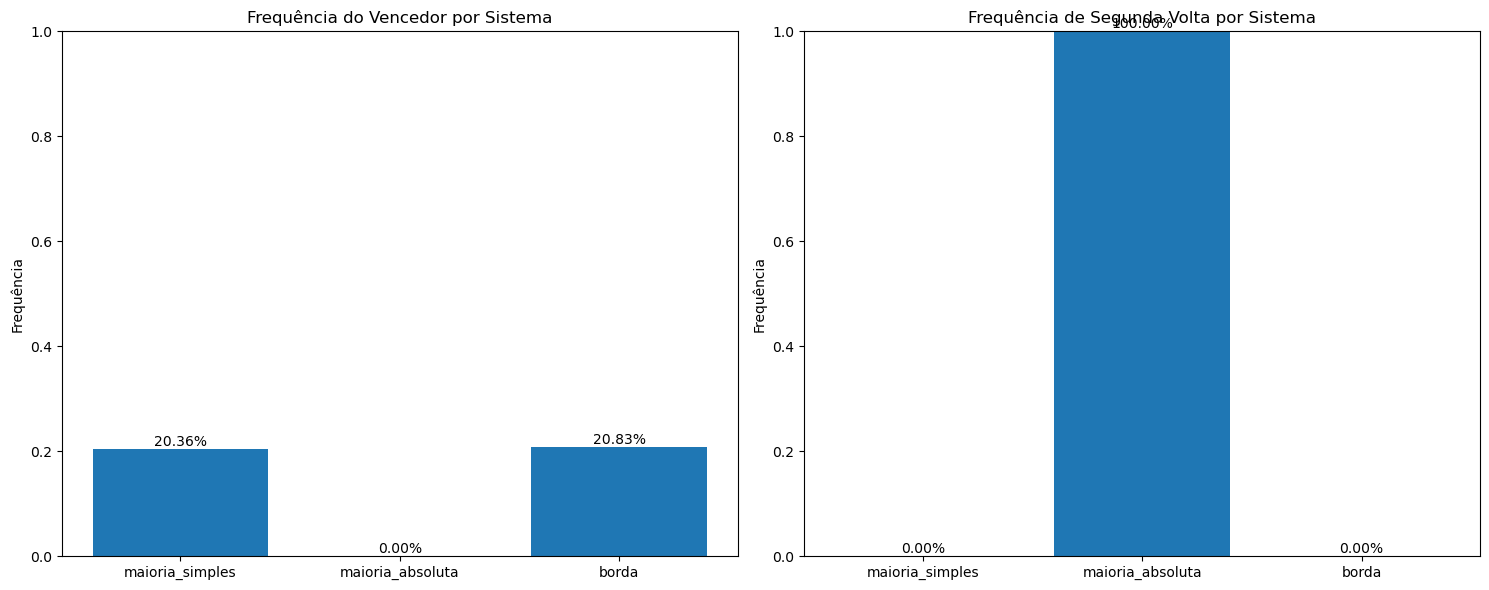

In [59]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simular_eleicao(num_eleitores, num_candidatos, sistema_eleitoral):
    if sistema_eleitoral in ['maioria_simples', 'maioria_absoluta']:
        votos = [random.randint(1, num_candidatos) for _ in range(num_eleitores)]
        contagem = Counter(votos)
        
        if sistema_eleitoral == 'maioria_simples':
            return max(contagem, key=contagem.get)
        elif sistema_eleitoral == 'maioria_absoluta':
            if max(contagem.values()) > num_eleitores / 2:
                return max(contagem, key=contagem.get)
            else:
                return 'Segunda Volta'
    elif sistema_eleitoral == 'borda':
        votos = [random.sample(range(1, num_candidatos + 1), num_candidatos) for _ in range(num_eleitores)]
        pontuacao = {i: 0 for i in range(1, num_candidatos + 1)}
        for voto in votos:
            for posicao, candidato in enumerate(voto):
                pontuacao[candidato] += num_candidatos - posicao
        return max(pontuacao, key=pontuacao.get)
    else:
        return 'Sistema não reconhecido'

def executar_simulacoes(num_simulacoes, num_eleitores, num_candidatos):
    sistemas = ['maioria_simples', 'maioria_absoluta', 'borda']
    resultados = {sistema: [] for sistema in sistemas}
    
    for _ in range(num_simulacoes):
        for sistema in sistemas:
            resultados[sistema].append(simular_eleicao(num_eleitores, num_candidatos, sistema))
    
    return resultados

def analisar_resultados(resultados, num_simulacoes):
    analise = {}
    for sistema, res in resultados.items():
        contagem = Counter(res)
        segunda_volta_freq = contagem.get('Segunda Volta', 0) / num_simulacoes
        contagem.pop('Segunda Volta', None)
        
        if contagem:
            vencedor = max(contagem, key=contagem.get)
            freq_vencedor = contagem[vencedor] / num_simulacoes
        else:
            vencedor = 'Não determinado'
            freq_vencedor = 0
        
        analise[sistema] = {
            'vencedor': vencedor,
            'freq_vencedor': freq_vencedor,
            'segunda_volta_freq': segunda_volta_freq
        }
    return analise

def visualizar_resultados(analise):
    sistemas = list(analise.keys())
    freq_vencedor = [analise[s]['freq_vencedor'] for s in sistemas]
    segunda_volta_freq = [analise[s]['segunda_volta_freq'] for s in sistemas]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de barras para frequência do vencedor
    ax1.bar(sistemas, freq_vencedor)
    ax1.set_title('Frequência do Vencedor por Sistema')
    ax1.set_ylabel('Frequência')
    ax1.set_ylim(0, 1)
    for i, v in enumerate(freq_vencedor):
        ax1.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    # Gráfico de barras para frequência de segunda volta
    ax2.bar(sistemas, segunda_volta_freq)
    ax2.set_title('Frequência de Segunda Volta por Sistema')
    ax2.set_ylabel('Frequência')
    ax2.set_ylim(0, 1)
    for i, v in enumerate(segunda_volta_freq):
        ax2.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Parâmetros da simulação
num_simulacoes = 10000
num_eleitores = 1000
num_candidatos = 5

# Executar simulações
resultados = executar_simulacoes(num_simulacoes, num_eleitores, num_candidatos)

# Analisar resultados
analise = analisar_resultados(resultados, num_simulacoes)

# Imprimir resultados
print(f"\nResultados das simulações ({num_simulacoes} simulações, {num_eleitores} eleitores, {num_candidatos} candidatos):")
for sistema, dados in analise.items():
    print(f"\n{sistema.capitalize()}:")
    print(f"  Vencedor mais frequente: {'Candidato ' + str(dados['vencedor']) if dados['vencedor'] != 'Não determinado' else dados['vencedor']}")
    print(f"  Frequência do vencedor: {dados['freq_vencedor']:.2%}")
    if sistema == 'maioria_absoluta':
        print(f"  Frequência de segunda volta: {dados['segunda_volta_freq']:.2%}")

# Visualizar resultados
visualizar_resultados(analise)

## Questões

In [61]:
import ipywidgets as widgets
from IPython.display import display, HTML

def check_answer(button):
    if button.description == correct_answer.value:
        result.value = "Correto!"
    else:
        result.value = "Incorreto. Tente novamente."

### Questão 1: Maioria Simples

In [63]:
import jupyterquiz

def quiz_maioria_simples():
    global correct_answer, result
    
    question = widgets.HTML(
        value="<h3>Quiz 1: Maioria Simples</h3><p>Numa eleição com três candidatos, os votos são distribuídos da seguinte forma:</p><ul><li>A: 45 votos</li><li>B: 30 votos</li><li>C: 25 votos</li></ul><p>Quem é o vencedor pela maioria simples?</p>"
    )
    
    options = ['A', 'B', 'C']
    correct_answer = widgets.fixed('A')
    
    buttons = [widgets.Button(description=opt) for opt in options]
    for button in buttons:
        button.on_click(check_answer)
    
    result = widgets.Label()
    
    display(question, *buttons, result)
    
print("Quiz 1: Maioria Simples")
quiz_maioria_simples()

Quiz 1: Maioria Simples


HTML(value='<h3>Quiz 1: Maioria Simples</h3><p>Numa eleição com três candidatos, os votos são distribuídos da …

Button(description='A', style=ButtonStyle())

Button(description='B', style=ButtonStyle())

Button(description='C', style=ButtonStyle())

Label(value='')

### Questão 2: Maioria absoluta

In [65]:
def quiz_maioria_absoluta():
    global correct_answer, result
    
    question = widgets.HTML(
        value="<h3>Quiz 2: Maioria Absoluta</h3><p>Numa eleição com três candidatos, os votos são distribuídos da seguinte forma:</p><ul><li>A: 45 votos</li><li>B: 30 votos</li><li>C: 25 votos</li></ul><p>Há um vencedor pela maioria absoluta?</p>"
    )
    
    options = ['Sim', 'Não']
    correct_answer = widgets.fixed('Não')
    
    buttons = [widgets.Button(description=opt) for opt in options]
    for button in buttons:
        button.on_click(check_answer)
    
    result = widgets.Label()
    
    display(question, *buttons, result)
    
print("\nQuiz 2: Maioria Absoluta")
quiz_maioria_absoluta()


Quiz 2: Maioria Absoluta


HTML(value='<h3>Quiz 2: Maioria Absoluta</h3><p>Numa eleição com três candidatos, os votos são distribuídos da…

Button(description='Sim', style=ButtonStyle())

Button(description='Não', style=ButtonStyle())

Label(value='')

### Questão 3: Métodos Eleitorais

In [67]:
def quiz_metodos_eleitorais():
    global correct_answer, result
    
    question = widgets.HTML(
        value="<h3>Quiz 3: Métodos Eleitorais</h3><p>Qual dos seguintes métodos eleitorais garante que o vencedor tenha mais de 50% dos votos?</p>"
    )
    
    options = ['Maioria Simples', 'Maioria Absoluta', 'Voto Aleatório']
    correct_answer = widgets.fixed('Maioria Absoluta')
    
    buttons = [widgets.Button(description=opt) for opt in options]
    for button in buttons:
        button.on_click(check_answer)
    
    result = widgets.Label()
    
    display(question, *buttons, result)
    
print("\nQuiz 3: Métodos Eleitorais")
quiz_metodos_eleitorais()


Quiz 3: Métodos Eleitorais


HTML(value='<h3>Quiz 3: Métodos Eleitorais</h3><p>Qual dos seguintes métodos eleitorais garante que o vencedor…

Button(description='Maioria Simples', style=ButtonStyle())

Button(description='Maioria Absoluta', style=ButtonStyle())

Button(description='Voto Aleatório', style=ButtonStyle())

Label(value='')